Francisco Boudagh

Artifical Neural Networks - FFR135

Code for HW1 - Recognising digits 2023

In [8]:
import numpy as np

In [9]:
# 2D pattern => 1D vector
def pattern_to_vector(pattern):
    return np.array([elem for sublist in pattern for elem in sublist])


# 1D vector => 2D pattern
def vector_to_pattern(vector, row_length):
    return vector.reshape(-1, row_length).tolist()


# Compute weights using Hebb's rule
def compute_weights(patterns):
    N = len(patterns[0])
    W = np.zeros((N, N))
    
    for p in patterns:
        for i in range(N):
            for j in range(N):
                W[i][j] += p[i] * p[j]        
    np.fill_diagonal(W, 0) # zero diagoanls
    return (1/N) * W


# Signum function
def sgn(p):
    if p >= 0:
        return 1
    else:
        return -1

# Update pattern
def update_pattern(W, pattern):
    N = len(pattern)
    updated_pattern = pattern.copy()
    for i in range(N):
        # sgn sum(W*p)
        updated_pattern[i] = sgn(np.dot(W[i], pattern))
    return updated_pattern


# Compares old pattern vs new patterns, returns true if equal
# Because when they are equal, it means that the pattern have converged
def check_convergence(old_pattern, new_pattern):
    return np.array_equal(old_pattern, new_pattern)


# Classify pattern
def classify_pattern(obtained, stored_patterns):
    for i, p in enumerate(stored_patterns):
        if np.array_equal(obtained, p):
            # Getting "0", one should enter 1, the index for it. 1-based indexing
            # So now we will get the "correct" classfied digit indexing directly
            return i + 1
        elif np.array_equal(obtained, -p):
            return -( i+1)
    return 6

In [10]:
# Given patterns for digits 0(=x1), 1(=x2), 2(=x3), 3(=x4), 4(=x5)
x1=[ [ -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] ];

x2=[ [ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1] ];

x3=[ [ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1] ];

x4=[ [ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1] ];

x5=[ [ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, 1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1] ];

patterns = [x1, x2, x3, x4, x5]
vector_patterns = [pattern_to_vector(p) for p in patterns]

# Compute weights (Hebb's) for the patterns above
W = compute_weights(vector_patterns)

In [11]:
pattern_1 = pattern_to_vector([[1, 1, 1, -1, -1, -1, -1, 1, 1, 1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]])

pattern_2 = pattern_to_vector([[1, 1, -1, -1, 1, -1, 1, 1, -1, -1], [1, 1, -1, -1, 1, -1, 1, 1, -1, -1], [1, 1, -1, -1, 1, -1, 1, 1, -1, -1], [1, 1, -1, -1, 1, -1, 1, 1, -1, -1], [1, 1, -1, -1, 1, -1, 1, 1, -1, -1], [1, 1, -1, -1, 1, -1, 1, 1, -1, -1], [1, 1, -1, -1, 1, -1, 1, 1, -1, -1], [1, 1, -1, 1, -1, 1, -1, 1, -1, -1], [1, 1, -1, 1, -1, 1, -1, 1, -1, -1], [1, -1, 1, -1, 1, -1, 1, 1, -1, -1], [1, -1, 1, -1, 1, -1, 1, 1, -1, -1], [1, -1, 1, -1, 1, -1, 1, 1, -1, -1], [1, -1, 1, -1, 1, -1, 1, 1, -1, -1], [1, -1, 1, -1, 1, -1, 1, 1, -1, -1], [1, -1, 1, -1, 1, -1, 1, 1, -1, -1], [1, -1, 1, -1, 1, -1, 1, 1, -1, -1]])

pattern_3 = pattern_to_vector([[-1, 1, -1, 1, -1, 1, -1, 1, 1, -1], [-1, 1, -1, 1, -1, 1, -1, 1, 1, -1], [1, -1, 1, -1, 1, 1, -1, 1, 1, -1], [1, -1, 1, -1, 1, 1, -1, 1, 1, -1], [1, -1, 1, -1, 1, 1, -1, 1, 1, -1], [1, -1, 1, -1, 1, 1, -1, 1, 1, -1], [1, -1, 1, -1, 1, 1, -1, 1, 1, -1], [-1, 1, -1, 1, -1, 1, -1, 1, 1, -1], [-1, 1, -1, 1, -1, 1, -1, 1, 1, -1], [-1, 1, -1, -1, 1, -1, 1, -1, 1, -1], [-1, 1, -1, -1, 1, -1, 1, -1, 1, -1], [-1, 1, -1, -1, 1, -1, 1, -1, 1, -1], [-1, 1, -1, -1, 1, -1, 1, -1, 1, -1], [-1, 1, -1, -1, 1, -1, 1, -1, 1, -1], [-1, 1, -1, 1, -1, 1, -1, 1, 1, -1], [-1, 1, -1, 1, -1, 1, -1, 1, 1, -1]])

patterns = [pattern_1, pattern_2, pattern_3]

rows = 10

for pattern in patterns:
    while True:
        updated_pattern = update_pattern(W, pattern)
        if check_convergence(pattern, updated_pattern):
            # stop when pattern converged
            break
        pattern = updated_pattern

    # Convert the 1D vector back to 2D
    converged_pattern = vector_to_pattern(pattern, rows)

    # Printing the converged pattern
    for row in converged_pattern:
        print(row)

    # Classify and print
    classification = classify_pattern(pattern, vector_patterns)
    print(f"\nPattern is classified as: {classification}\n\n\n")

[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]
[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]

Pattern is classified as: 2



[1, 1, 1, 1, 1, 1, 1, 1, -1, -1]
[1, 1, 1, 1, 1, 1, 1, 1, -1, -1]
[-1, -1, -1, -1, -1, 1, 1, 1, -1, -1]
[-1, -1, -1, -1, -1, 1, 1, 1, -1, -1]
[-1, -1, -1, -1, -1, 1, 1, 1, -1, -1]
[-1, -1, -1, -1, -1, 1, 1, 1, -1, -1]
[-1, -1, -1, -1, -1, 1, 1, 1, -1, -1]
[1, 1, 1, 1, 1, 1, 1, 1, -1, -1]
[1, 1, 1, 1, 1, 1, 1, 1, -1, -1]
[1, 1, 1, -1, -1, -1, -1, -1, -1, -1]
[1, 1, 1, -1, -1

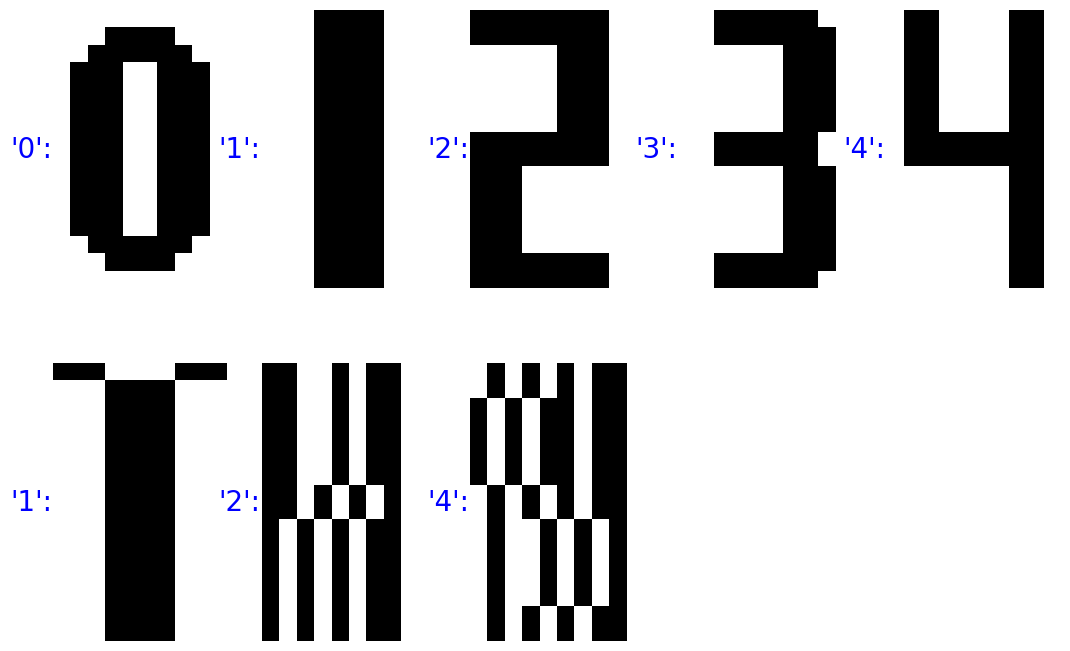

In [12]:
import matplotlib.pyplot as plt

patterns = [pattern_to_vector(x1),
            pattern_to_vector(x2), 
            pattern_to_vector(x3), 
            pattern_to_vector(x4), 
            pattern_to_vector(x5), 
            pattern_1, 
            pattern_2, 
            pattern_3]

digit_labels = ["'0':", "'1':", "'2':", "'3':", "'4':", "'1':", "'2':", "'4':"]

def plot_pattern(pattern, label):
    pattern_images = vector_to_pattern(pattern, 10)
    plt.imshow(pattern_images, cmap='gray_r')
    plt.axis('off')
    plt.text(-3, 8, label, fontsize=20, color="blue")

plt.figure(figsize=(13, 13))
for idx, (pattern, label) in enumerate(zip(patterns, digit_labels), start=1):
    plt.subplot(3, 5, idx)
    plot_pattern(pattern, label)
plt.show()
